In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def plot_mesh(mesh):
    node_positions = {}
        
    for node in mesh.nodes:
        node_positions[node] = mesh.nodes[node]['pos']


    fig, ax = plt.subplots(figsize=(8,7))

    nx.draw(mesh, 
            with_labels = True,
            pos=node_positions, 
            node_size= 20,  
            ax = ax) 

    plt.tight_layout()
    plt.show()   

In [89]:
N = 10

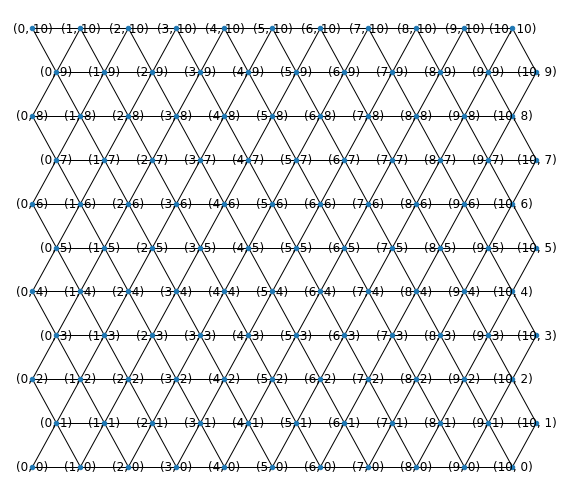

In [109]:
def big_hexagon_leaf(N):

    'works for N values that are 2 times some odd number. E.g. N = 6, 10, 14...'
    
    mesh = nx.generators.triangular_lattice_graph(N,2*N)

    n_x = 0
    n_y = N//2

    try:
        mesh.remove_edge((n_x, n_y), (n_x, n_y+1))
        mesh.remove_edge((n_x, n_y-1), (n_x, n_y))
    except:
        print('edge not in the network')

    for i in range(1, N//2 +1):
        if i % 2: # if odd
            n_x += 1
            n_y += 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x-1, n_y), (n_x, n_y))
                mesh.remove_edge((n_x-1, n_y+1), (n_x, n_y))
            except:
                print('edge not in the network')

        else:
            n_y += 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x-1, n_y), (n_x, n_y))
                mesh.remove_edge((n_x, n_y), (n_x, n_y+1))
            except:
                print('edge not in the network')


    # for decreasing:
    n_x = 0
    n_y = N//2

    for i in range(1, N//2 +1):
        if i % 2: # if odd
            n_x += 1
            n_y -= 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x-1, n_y), (n_x, n_y))
                mesh.remove_edge((n_x-1, n_y-1), (n_x, n_y))
            except:
                print('edge not in the network')

        else:
            n_y -= 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x-1, n_y), (n_x, n_y))
                mesh.remove_edge((n_x, n_y), (n_x, n_y-1))
            except:
                print('edge not in the network')

    n_x = N
    n_y = int(N/2)

    for i in range(1, int(N/2) +1):
        if i % 2:
            n_y += 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y))
            except:
                print('edge not in the network')
            try:
                mesh.remove_edge((n_x, n_y), (n_x, n_y+1))
            except:
                print('edge not in the network')

        else:
            n_x -= 1
            n_y += 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y))
            except:
                print('edge not in the network')
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y+1))
            except:
                print('edge not in the network')


    # decreasing:
    n_x = N
    n_y = int(N/2)

    for i in range(1, N//2 +1):
        if i % 2:
            n_y -= 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y))
            except:
                print('edge not in the network')
            try:
                mesh.remove_edge((n_x, n_y), (n_x, n_y-1))
            except:
                print('edge not in the network')
        else:
            n_x -= 1
            n_y -= 1
            print((n_x, n_y))
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y))
            except:
                print('edge not in the network')
            try:
                mesh.remove_edge((n_x, n_y), (n_x+1, n_y-1))
            except:
                print('edge not in the network')

    largest_cc = max(nx.connected_components(mesh), key=len)

    G_frozen = mesh.subgraph(largest_cc)
    G = nx.Graph(G_frozen)
    return G


In [110]:
G = big_hexagon_leaf(N)

(1, 6)
(1, 7)
(2, 8)
(2, 9)
(3, 10)
edge not in the network
(1, 4)
(1, 3)
(2, 2)
(2, 1)
(3, 0)
edge not in the network
(10, 6)
edge not in the network
(9, 7)
(9, 8)
(8, 9)
(8, 10)
edge not in the network
(10, 4)
edge not in the network
(9, 3)
(9, 2)
(8, 1)
(8, 0)
edge not in the network


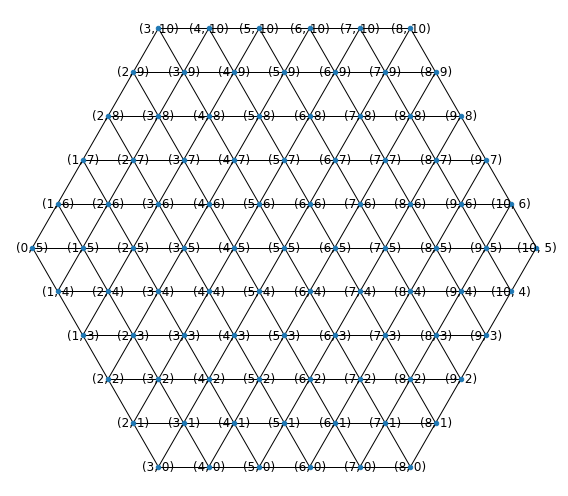

In [111]:
plot_mesh(G)

In [112]:
K = 1
gamma = 0.5 

def parameterize_leaf(N):
    
    'add transport netowrk variables'

    G = big_hexagon_leaf(N)

    # add edge attr:
    nx.set_node_attributes(G, -1, 'P') # set node strength
    G.nodes[(0,N//2)]['P'] = G.number_of_nodes() - 1 # set supply node strength
    nx.set_node_attributes(G, 0, 'theta') # initialize potentials, not important, will be the first thing to calculate
    nx.set_node_attributes(G, 'C0', 'color')

    # add node attr:
    nx.set_edge_attributes(G, 1/(G.number_of_nodes()**(1/gamma)), 'weight') # set initial capacity dist. to be uniform, use 'weight' instead of 'k' for easy access of laplacian matrix
    nx.set_edge_attributes(G, 0, 'F') # let's assume that flow is always a positive number here


    return G

(1, 6)
(1, 7)
(2, 8)
(2, 9)
(3, 10)
edge not in the network
(1, 4)
(1, 3)
(2, 2)
(2, 1)
(3, 0)
edge not in the network
(10, 6)
edge not in the network
(9, 7)
(9, 8)
(8, 9)
(8, 10)
edge not in the network
(10, 4)
edge not in the network
(9, 3)
(9, 2)
(8, 1)
(8, 0)
edge not in the network


In [107]:
import relaxation

In [118]:
G = parameterize_leaf(N)

relaxation.randomized_k(G)

for i in range(50):
    print('iteration:', i+1)
    relaxation.solve_P_theta(G)
    relaxation.new_k(G)
    print('dissipation D:', G.graph['D'])
    print('number of edges left:',G.number_of_edges())
    print()

(1, 6)
(1, 7)
(2, 8)
(2, 9)
(3, 10)
edge not in the network
(1, 4)
(1, 3)
(2, 2)
(2, 1)
(3, 0)
edge not in the network
(10, 6)
edge not in the network
(9, 7)
(9, 8)
(8, 9)
(8, 10)
edge not in the network
(10, 4)
edge not in the network
(9, 3)
(9, 2)
(8, 1)
(8, 0)
edge not in the network
iteration: 1
dissipation D: 59994640.88702829
number of edges left: 240

iteration: 2
dissipation D: 43940036.45954101
number of edges left: 240

iteration: 3
dissipation D: 34805359.93113363
number of edges left: 240

iteration: 4
dissipation D: 29019816.50938354
number of edges left: 238

iteration: 5
dissipation D: 25733682.231516417
number of edges left: 229

iteration: 6
dissipation D: 23889114.143297106
number of edges left: 214

iteration: 7
dissipation D: 22785367.18759341
number of edges left: 191

iteration: 8
dissipation D: 21829783.590952888
number of edges left: 173

iteration: 9
dissipation D: 20813199.126414414
number of edges left: 149

iteration: 10
dissipation D: 19844147.895389006
num

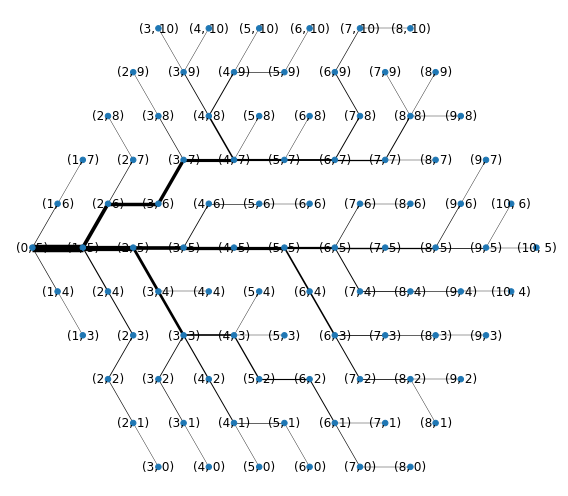

In [119]:
relaxation.plot_network(G)